In [1]:
#q1
# q3
# iqr
# ub = q3 + 1.5 iqr
# lb = q1- 1.5 iqr

### outlier:
data point in a dataset that is distant from all other observations.

### What are the impacts of having outliers in a dataset?
It causes various problems during our statistical analysis
It may cause a significant impact on the mean and the standard deviation

### Various ways of finding the outlier.
- Using scatter plots
- Box plot
- using z score
- using the IQR interquantile range

### Using Z score
Formula for Z score = (Observation — Mean)/Standard Deviation

z = (X — μ) / σ

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

In [10]:
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

outlier_pt=detect_outliers(dataset)
outlier_pt

[102, 107, 108]

### using InterQuantile Range
75%- 25% values in a dataset

Steps
1. Arrange the data in increasing order
2. Calculate first(q1) and third quartile(q3)
3. Find interquartile range (q3-q1)
4. Find lower bound q1*1.5
5. Find upper bound q3*1.5

Anything that lies outside of lower and upper bound is an outlier

In [11]:
## Perform all the steps of IQR
sorted(dataset)

quantile1, quantile3= np.percentile(dataset,[25,75])
print(quantile1,quantile3)

12.0 15.0


In [14]:
## Find the IQR

iqr=quantile3-quantile1
print(iqr)

3.0


In [15]:
## Find the lower bound value and the higher bound value

lower_bound_val = quantile1 -(1.5 * iqr) 
upper_bound_val = quantile3 +(1.5 * iqr)
print(lower_bound_val,upper_bound_val)

7.5 19.5


### Outlier treatment: replace up outlier with the 99% value and lb outlier with 1% value

In [100]:
market = pd.read_csv('Market_data.csv')
market.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
market.shape

(8523, 12)

In [101]:
# to know the number of outliers:
#def findoutlier(x):
m1=market
for i in m1._get_numeric_data().columns:
        q1= m1[i].quantile(0.25)
        q3= m1[i].quantile(0.75)
        iqr= q3-q1
        ub = q3 + 1.5*iqr
        lb = q1 - 1.5*iqr
        
        m= m1[m1[i]<lb][i].count()
           
        n = m1[m1[i]>ub][i].count()
        
        print(i,' : ',n,m)
    
    



Item_Weight  :  0 0
Item_Visibility  :  144 0
Item_MRP  :  0 0
Outlet_Establishment_Year  :  0 0
Item_Outlet_Sales  :  186 0


In [41]:
market1=market._get_numeric_data()
q1= market1.quantile(0.25)
q3= market1.quantile(0.75)
iqr= q3-q1
((market1<(q1 - 1.5*iqr))| (market1>(q3 + 1.5*iqr))).sum()

Item_Weight                    0
Item_Visibility              144
Item_MRP                       0
Outlet_Establishment_Year      0
Item_Outlet_Sales            186
dtype: int64

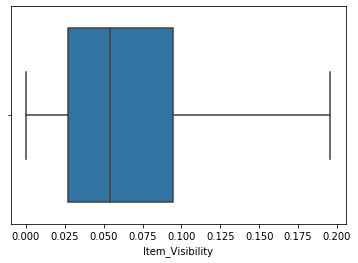

In [98]:
# Capping outlier: 
# replace up outlier with the 99% value and lb outlier with 1% value

m1=market
for i in m1._get_numeric_data().columns:
        q1= m1[i].quantile(0.25)
        q3= m1[i].quantile(0.75)
        iqr= q3-q1
        ub = q3 + 1.5*iqr
        lb = q1 - 1.5*iqr
        
        m= m1[m1[i]<lb][i].count()
        m1[i]=m1[i].replace(m1[m1[i]<lb][i],m1[i].quantile(0.01))
            
        n = m1[m1[i]>ub][i].count()
        m1[i]=m1[i].replace(m1[m1[i]>ub][i],m1[i].quantile(0.98))         # adjust the quantile range to remove outlier        
        
import seaborn as sb
sb.boxplot(m1.Item_Visibility)   # after the treatment

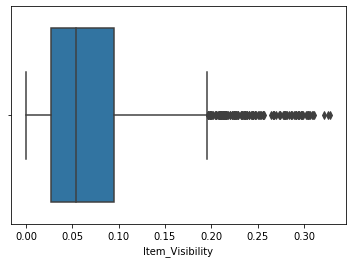

In [97]:
sb.boxplot(market.Item_Visibility)             # original